<a href="https://colab.research.google.com/github/filipecmedeiros/CIFAR-100/blob/main/CIFAR-100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 1. Importar módulos necessários:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense

#### 2. Importação e preparação dos dados:

In [ ]:
# Definir parâmetros do modelo e dos dados
num_classes = 10
input_shape = (28, 28, 1)

In [ ]:
# Importar os dados e realizar a divisão entre conjuntos de treino e teste
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalizar as imagens entre 0 e 1
x_train = x_train.astype("float32")/255.
x_test = x_test.astype("float32")/255.

# Redimensionar as imagens para o formato (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Imprimir informações
print("\nDimensões das imagens:", x_train.shape[1:])
print(x_train.shape[0], "amostras de treino")
print(x_test.shape[0], "amostras de teste")

# Codificar o vetor de rótulos
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


Dimensões das imagens: (28, 28, 1)
60000 amostras de treino
10000 amostras de teste


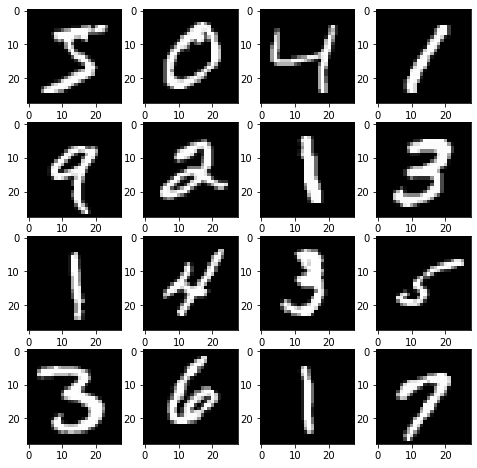

In [ ]:
# Imprimir algumas imagens do conjunto de dados
nrows = 4
ncols = 4

fig, ax = plt.subplots(nrows, ncols, figsize=(8, 8))
for idx in range(nrows):    
    for jdx in range(ncols): 
        ax[idx,jdx].imshow(x_train[jdx + nrows*idx, :, :, 0], cmap='gray')

#### 3. Construção e treinamento do modelo:

In [ ]:
# Definir o modelo de classificação (rede neural convolucional)
model = keras.Sequential(
    [
        Input(shape=input_shape),
        Conv2D(8, padding = "same", kernel_size=(3, 3), activation="relu", name="conv1"),
        MaxPool2D(pool_size=(2, 2), name="maxp1"),
        Conv2D(16, padding = "same", kernel_size=(3, 3), activation="relu"),
        MaxPool2D(pool_size=(2, 2)),
        Flatten(),
        Dense(num_classes, activation="softmax")
    ]
)

# Imprimir detalhes da estrutura do modelo
model.summary()

# Compilar o modelo; definir a perda, o algoritmo de otimização e a métrica para acompanhar o desempenho
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 28, 28, 8)         80        
_________________________________________________________________
maxp1 (MaxPooling2D)         (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
Total params: 9,098
Trainable params: 9,098
Non-trainable params: 0
____________________________________________________

In [ ]:
# Definir parâmetros do treinamento
batch_size = 128
epochs = 10

# Treinar o classificador
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 4s 8ms/step - loss: 0.4781 - accuracy: 0.8685 - val_loss: 0.1520 - val_accuracy: 0.9583
Epoch 2/10
422/422 [==============================] - 3s 6ms/step - loss: 0.1524 - accuracy: 0.9541 - val_loss: 0.1061 - val_accuracy: 0.9705
Epoch 3/10
422/422 [==============================] - 3s 7ms/step - loss: 0.1106 - accuracy: 0.9660 - val_loss: 0.0876 - val_accuracy: 0.9757
Epoch 4/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0908 - accuracy: 0.9723 - val_loss: 0.0812 - val_accuracy: 0.9762
Epoch 5/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0791 - accuracy: 0.9754 - val_loss: 0.0694 - val_accuracy: 0.9822
Epoch 6/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0705 - accuracy: 0.9781 - val_loss: 0.0726 - val_accuracy: 0.9783
Epoch 7/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0647 - accuracy: 0.9805 - val_loss: 0.0636 - val_accuracy: 0.9828
Epoch 

#### 4. Avaliar modelo:

In [ ]:
# Calculando o valor da métrica de avaliação do modelo
score = model.evaluate(x_test, y_test, verbose=0)
print("Loss - Conjunto de testes:", score[0])
print("Acurácua - Conjunto de testes:", score[1])

Loss - Conjunto de testes: 0.048815734684467316
Acurácua - Conjunto de testes: 0.9843000173568726


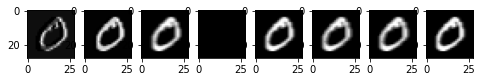

In [ ]:
# Obter um modelo "intermediário"
layer_name = 'conv1'
intermediate_layer_model = keras.Model(inputs=model.input,
                                       outputs=model.get_layer(layer_name).output)

intermediate_output = intermediate_layer_model.predict(x_train[1, :, :, :])

# Imprimir as ativações da camada convolucional 1
nfilters = intermediate_output.shape[3]

fig, ax = plt.subplots(1, nfilters, figsize=(8, 4))
for idx in range(nfilters):    
        ax[idx].imshow(intermediate_output[:, :, 0, idx], cmap='gray')